<a href="https://colab.research.google.com/github/Gitika-26/Gitika-26/blob/main/MNISTPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape of X: (70000, 784)
Shape of y: (70000,)


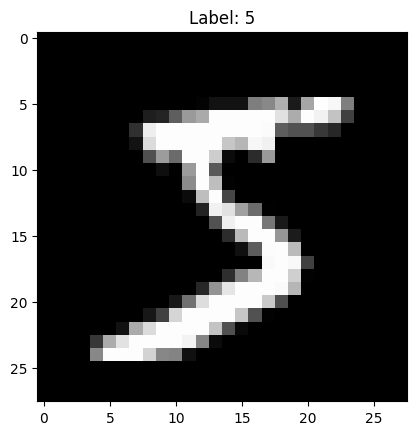

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
import io

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Display the shape of the dataset
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Display a sample digit
plt.imshow(X.iloc[0].values.reshape(28, 28), cmap='gray')
plt.title(f"Label: {y[0]}")
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




# Function to preprocess the uploaded image
def preprocess_image(image):
    # Convert image to grayscale and resize to 28x28
    image = image.convert('L')
    image = image.resize((28, 28))

    # Convert image to numpy array and scale it
    image = np.array(image)
    image = image / 255.0  # Normalize to [0, 1]

    # Flatten the image to match the input format of the model
    image = image.flatten().reshape(1, -1)

    return image



In [3]:


# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.95      0.99      0.97      1600
           2       0.95      0.94      0.94      1380
           3       0.93      0.95      0.94      1433
           4       0.95      0.94      0.94      1295
           5       0.95      0.94      0.94      1273
           6       0.97      0.97      0.97      1396
           7       0.94      0.93      0.93      1503
           8       0.97      0.90      0.93      1357
           9       0.90      0.92      0.91      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

Confusion Matrix:
[[1318    0    4    4    0    5   11    0    1    0]
 [   0 1587    8    0    2    0    1    1    0    1]
 [  12   16 1298   18    4    4    7   10    8    3]
 [   3    5   16 1361    2   11    1   14

In [10]:
print(len(X_test), len(y_test), len(y_pred))


14000 14000 14000


Processing index 0
Processing index 1
Processing index 2
Processing index 3
Processing index 4
Processing index 5
Processing index 6
Processing index 7
Processing index 8
Processing index 9
Processing index 10
Processing index 11
Processing index 12
Processing index 13
Processing index 14


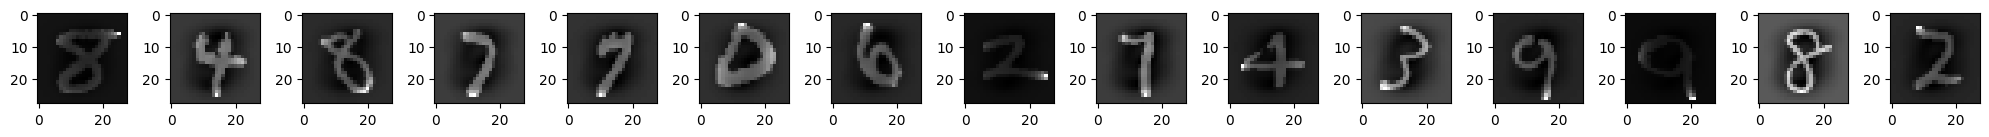

In [16]:
def plot_predictions(X_test, y_test, y_pred, n=15):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        print(f"Processing index {i}")
        if i < len(X_test):
            ax = plt.subplot(1, n, i + 1)
            plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.tight_layout()
    plt.show()

plot_predictions(X_test, y_test, y_pred)


In [17]:
 #Function to preprocess the uploaded image
def preprocess_image(image):
    # Convert image to grayscale and resize to 28x28
    image = image.convert('L')
    image = image.resize((28, 28))

    # Convert image to numpy array and scale it
    image = np.array(image)
    image = image / 255.0  # Normalize to [0, 1]

    # Flatten the image to match the input format of the model
    image = image.flatten().reshape(1, -1)

    return image

# Function to predict the digit
def predict_digit(image):
    # Preprocess the image
    processed_image = preprocess_image(image)

    # Standardize the image using the same scaler used for training
    processed_image = scaler.transform(processed_image)

    # Predict the digit
    prediction = best_knn.predict(processed_image)

    return prediction[0]

In [ ]:
example_image_path = "C:/Users/phgtk/Datasets/images.png"
example_image = Image.open(example_image_path)
predicted_digit = predict_digit(example_image)
print(f"Predicted Digit: {predicted_digit}")